## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('./datasets/train_clean.csv')
df_test = pd.read_csv('./datasets/test_clean.csv')

## Box Plot

Text(0.5, 0, '\nHome Values')

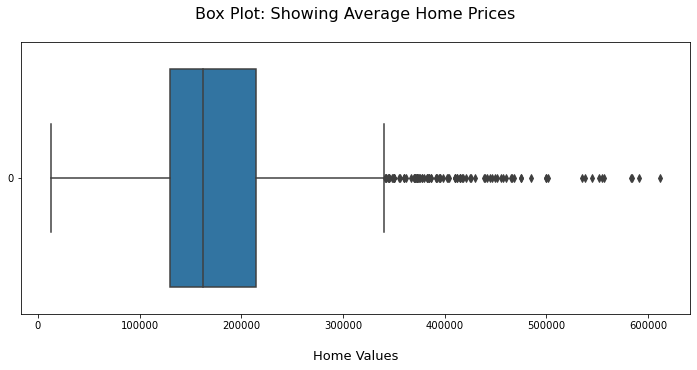

In [3]:
plt.figure(figsize = (12,5))
plt.title('Box Plot: Showing Average Home Prices\n', fontsize = 16)
sns.boxplot(data = df_train['SalePrice'], orient = 'h')
plt.xlabel('\nHome Values', fontsize = 13)

In [62]:
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [68]:
df_train['Gr Liv Area'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64

## Heatmap

In [4]:
corr = df_train.corr()

Text(0.5, 1.0, 'Overall Heatmap\n')

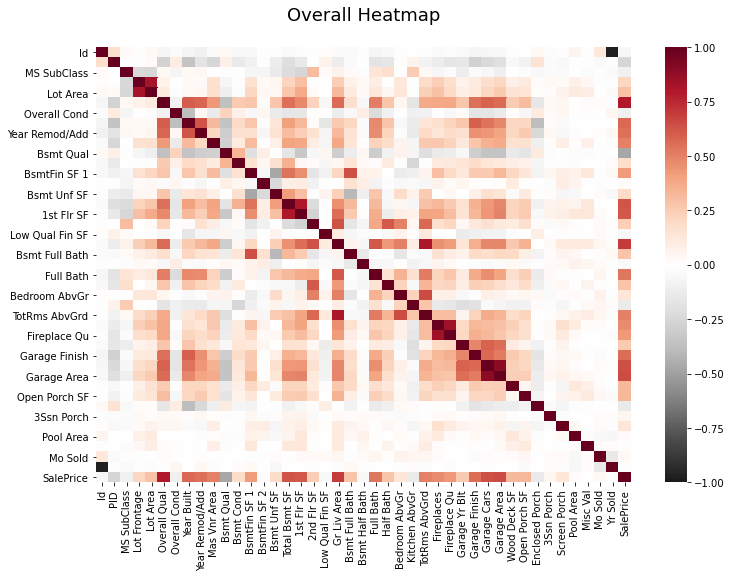

In [71]:
corr = df_train.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, 
            annot=False, 
           vmin = -1,
           vmax = 1,
           cmap = "RdGy_r" 
           );
plt.title('Overall Heatmap\n', fontsize = 18)

Looking for intercorrelations that could pose problems. For the most part they seem to make sense, such as Garage Yr Blt and Year Built would be the same if the garage was built with the rest of the home. It is a little harder to read with annotations, so I'll focus in and see next what correlates strictly with Sales Price.

## Sales Price Heat Map

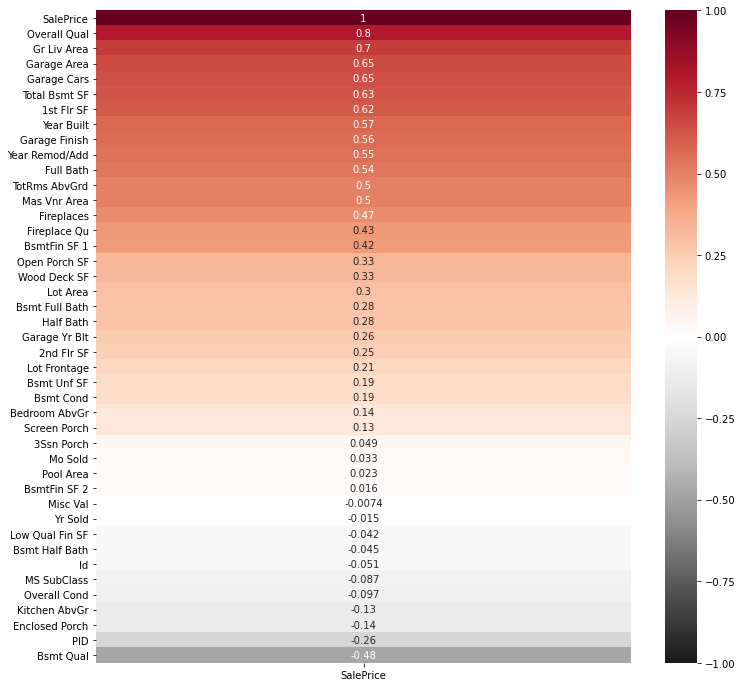

In [65]:
plt.figure(figsize = (12, 12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), 
            annot=True, 
           vmin = -1,
           vmax = 1,
           cmap = "RdGy_r" 
           );

There are a lot of features that highly correlate with SalePrice. I would like to visualize them further with pair plots and scatter plots to see if the features are linearlly correlated. 

In [29]:
high_corr = corr[abs(corr['SalePrice']) > 0.3]

<Figure size 864x864 with 0 Axes>

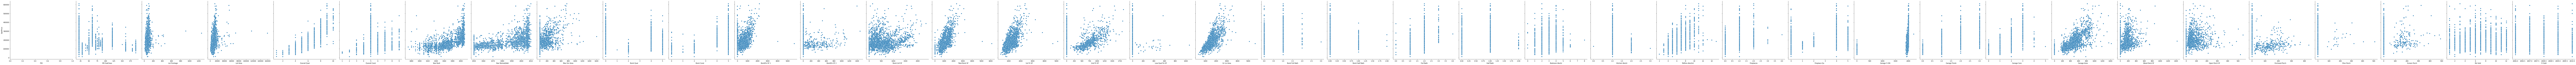

In [67]:
plt.figure(figsize = (12,12))
sns.pairplot(data = df_train, x_vars = high_corr.columns, y_vars = ['SalePrice'], height = 6,)
plt.tight_layout()

(Double click the images in the pairplot if they are tiny to be able to scroll through larger graphs.)

**Lot Frontage** : Could be linear  
**Lot Area** : Appears to be linear  
**Year Built** : Seems to start more linear but then the graph curves up more exponentially at the end  
**Year Remodel** : Could be linear or more exponential at the end  
**Basement Finish SF** : Seems to be exponential, possibly linear. Will run tests.  
**Basement Finish SF 2** : Seems to be linear. Will run tests.   
**Total Basement SF** : Looks to be exponential  
**1st Floor SF** : Possibly linear, will run tests.    
**2nd Flr SF** : Possibly linear, will run tests.  
**Garage Living Area** : Looks exponential  
**Garage Year Built** : Looks exponential  
**Garage Area** : Could be linear  
**Wood Deck** : Could be exponential  
**Enclosed Porch** : Looks linear  

In [31]:
high_corr.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [32]:
high_corr.drop(columns = ['SalePrice', 'Id', 'Pool Area', 'Misc Val'], inplace = True)

C:\Users\kendr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
high_corr_list = high_corr.columns

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

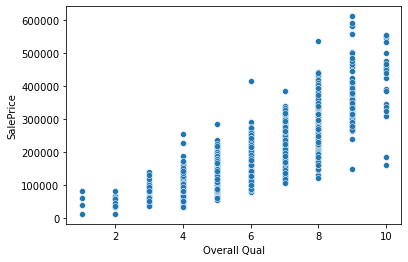

In [34]:
sns.scatterplot(data = df_train, x = 'Overall Qual', y = 'SalePrice')

<AxesSubplot:xlabel='Overall Cond', ylabel='SalePrice'>

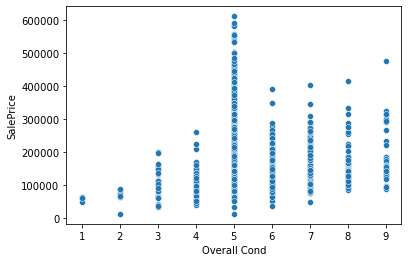

In [60]:
sns.scatterplot(data = df_train, x = 'Overall Cond', y = 'SalePrice')

I created a new scatterplot for Overall Quality versus Sale Price beacuse the scale in the pairplot was not showing any information.

In [35]:
df_train[high_corr_list].dtypes

PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
Bsmt Qual          float64
Bsmt Cond          float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Fireplace Qu       float64
Garage Yr Blt      float64
Garage Finish        int64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
M

In [51]:
X = df_train[high_corr.columns]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8557766899260177, 0.8174720488021854)

In [55]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.88402016, 0.86386987, 0.66855561, 0.89138738, 0.83736864])

In [56]:
cross_val_score(lr, X_test, y_test, cv=5)

array([0.15655731, 0.82992198, 0.86159824, 0.80046576, 0.85427551])

In [57]:
predictions = lr.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, predictions))

33168.04003014229

In [59]:
dict(zip(X.columns, lr.coef_))

{'PID': -6.876164237996688e-06,
 'MS SubClass': -152.99628420638533,
 'Lot Frontage': -134.90142466398257,
 'Lot Area': 1.28515496167077,
 'Overall Qual': 15168.437483929589,
 'Overall Cond': 5404.974492732698,
 'Year Built': 299.49972971671997,
 'Year Remod/Add': 167.63126989686805,
 'Mas Vnr Area': 33.16208208197979,
 'Bsmt Qual': -8503.217799122047,
 'Bsmt Cond': 4087.9817908207933,
 'BsmtFin SF 1': 7.002192591657611,
 'BsmtFin SF 2': 3.981454559544033,
 'Bsmt Unf SF': 0.922242172315439,
 'Total Bsmt SF': 11.906003973327206,
 '1st Flr SF': 15.982240672357385,
 '2nd Flr SF': 16.241521170323473,
 'Low Qual Fin SF': -6.867020643623908,
 'Gr Liv Area': 25.356698665530082,
 'Bsmt Full Bath': 8208.189701355239,
 'Bsmt Half Bath': -2070.05508081231,
 'Full Bath': 3076.8863740920965,
 'Half Bath': -2738.0819581056485,
 'Bedroom AbvGr': -5129.268701559725,
 'Kitchen AbvGr': -16893.70835256179,
 'TotRms AbvGrd': 4438.547772406302,
 'Fireplaces': 7462.461200153384,
 'Fireplace Qu': -747.478480

In [45]:
X_kaggle = df_test[high_corr_list]

In [47]:
kaggle_predictions = lr.predict(X_kaggle)

In [48]:
kaggle_submission = pd.DataFrame()

kaggle_submission['Id'] = df_test['Id']
kaggle_submission['SalePrice'] = kaggle_predictions

kaggle_submission.head()

,Id,SalePrice
0,2658,151408.519816
1,2718,156577.952233
2,2414,220158.589409
3,1989,120572.889214
4,625,210323.728858


In [49]:
kaggle_submission.shape, df_test.shape

((878, 2), (878, 80))

In [50]:
kaggle_submission.to_csv('./kaggle/kaggle_submission_02.csv', index=False)